In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

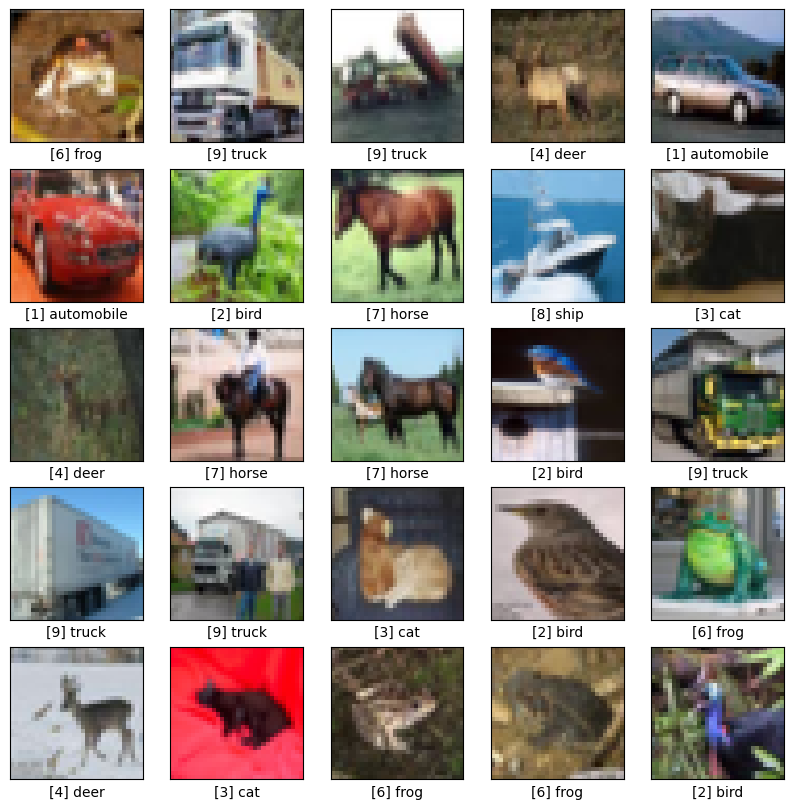

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]]))
plt.show()

In [12]:
model = Sequential()

model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(layers.Flatten(input_shape=(32, 32)))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,014 (2.33 MB)

 Trainable params: 610,014 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=50, batch_size=56, verbose=True, validation_data=(x_test,y_test))

Epoch 1/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.2041 - loss: 2.2256 - val_accuracy: 0.3660 - val_loss: 1.7344
Epoch 2/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3658 - loss: 1.7123 - val_accuracy: 0.4202 - val_loss: 1.5936
Epoch 3/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4491 - loss: 1.5208 - val_accuracy: 0.5022 - val_loss: 1.4038
Epoch 4/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4986 - loss: 1.4020 - val_accuracy: 0.5531 - val_loss: 1.2662
Epoch 5/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5313 - loss: 1.3061 - val_accuracy: 0.5706 - val_loss: 1.2401
Epoch 6/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5640 - loss: 1.2434 - val_accuracy: 0.5961 - val_loss: 1.1728
Epoch 7/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5915 - loss: 1.1673 - val_accuracy: 0.5981 - val_loss: 1.1450
Epoch 8/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6027 - loss: 1.1334 - val_accuracy

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: ", test_acc*100)
print(f"Test Loss: ", test_loss*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7654 - loss: 0.7199
Test Accuracy:  76.41000151634216
Test Loss:  72.65870571136475
